In [42]:
from daftlistings import Daft, SaleType, HouseType, SortType
import statsmodels.api as sm
import pandas as pd
import numpy as np
from IPython.display import HTML

daft = Daft()

county = "Dublin"
areas = ["Ashtown","Dublin 7"]
#areas = ["Ashtown"]

daft.set_listing_type(SaleType.HOUSES)
daft.set_house_type(HouseType.DETACHED)
daft.set_area(areas)
daft.set_county(county)
daft.set_sort_by(SortType.PRICE)

df = pd.DataFrame()

listings = daft.search()


for listing in listings:
    data = pd.DataFrame([listing.price,  listing.bedrooms,  listing.bathrooms, listing.dwelling_type, listing.ber_code, listing.floor_area,  listing.daft_link]).T
    df = df.append(data)

# Rename the columns
df.columns = ["Price", 'Beds', 'Baths', 'Type', 'BER', 'Area', 'URL']


# Convert the datatypes to int or float
df.Price = df.Price.astype(int)
df.Beds = df.Beds.astype(int)
df.Baths = df.Baths.astype(int)
df['Area'] = df['Area'].str.strip()
df.Area = df.Area.replace(r'^\s*$', np.nan, regex=True)
df.Area = df.Area.fillna(50).astype(float)
df.BER = df.BER.replace('exempt', 'G')
df.BER.fillna(value='G', inplace = True)


# Display the output
display(HTML(df.to_html()))

http://www.daft.ie/dublin/houses-for-sale/ashtown,dublin-7?offset=0s%5Bhouse_type%5D=detached&s%5Bsort_type%5D=d&s%5Bsort_by%5D=price
Fetching page 1 of 5 
Fetching page 2 of 5 
Fetching page 3 of 5 
Fetching page 4 of 5 
Fetching page 5 of 5 
Fetched 98 listings.


,Price,Beds,Baths,Type,BER,Area,URL
0,1400000,7,7,End of Terrace House,G,208.00,http://www.daft.ie/dublin/houses-for-sale/dublin-7/327-north-circular-road-phibsborough-dublin-7-dublin-2323486/
0,900000,5,4,Detached House,G,166.00,http://www.daft.ie/dublin/houses-for-sale/dublin-7/199-navan-road-dublin-7-dublin-2418397/
0,815000,5,5,Terraced House,G,50.00,http://www.daft.ie/dublin/houses-for-sale/north-circular-road/flat-1-6-summer-street-north-north-circular-road-dublin-2418810/
0,749950,7,3,Terraced House,G,287.00,http://www.daft.ie/dublin/houses-for-sale/dublin-7/127-north-circular-road-dublin-7-dublin-2297930/
0,700000,9,9,Terraced House,G,50.00,http://www.daft.ie/dublin/houses-for-auction/north-circular-road/571-north-circular-road-dublin-2385108/
0,619950,3,3,Detached House,D1,161.00,http://www.daft.ie/dublin/houses-for-sale/navan-road-d7/39-croaghpatrick-road-navan-road-d7-dublin-2392970/
0,599950,3,3,Terraced House,D2,134.00,http://www.daft.ie/dublin/houses-for-sale/north-circular-road/19-ellesmere-avenue-north-circular-road-dublin-2202566/
0,595000,4,3,Semi-Detached House,C3,117.90,http://www.daft.ie/dublin/houses-for-sale/ashtown/18-the-paddocks-blackhorse-avenue-ashtown-dublin-2308671/
0,595000,3,1,Semi-Detached House,G,90.00,http://www.daft.ie/dublin/houses-for-sale/dublin-7/54-old-cabra-road-dublin-7-dublin-2132277/
0,585000,3,2,Semi-Detached House,G,50.00,http://www.daft.ie/dublin/houses-for-sale/navan-road-d7/15-glenbeigh-park-navan-road-d7-dublin-2418939/


## Regression model

In [43]:
 ##### Run a regression model #####
X = df[["Beds", "Baths","Area"]]
y = df["Price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# make the predictions by the model
predictions = model.predict(X) 

# Print out the statistics
model.summary()


from statsmodels.formula.api import ols

fit = ols('Price ~ C(Type) + C(BER) + Baths + Beds + Area', data=df).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     8.510
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           7.36e-12
Time:                        00:59:50   Log-Likelihood:                -1259.1
No. Observations:                  98   AIC:                             2554.
Df Residuals:                      80   BIC:                             2601.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           4.1e+04   1.29e+05      0.318      0.752   -2.16e+05    2.98e+05
C(Type)[T. End of Terrace House]  -4.33e+04   5.81e+04     -0.746      0.458   -1.59e+05    7.23e+04
C(Type)[T. Semi-Detached House]  -3.943e+04    5.8e+04     -0.679      0.499   -1.55e+05    7.61e+04
C(Type)[T. Terraced House]       -3.169e+04   5.77e+04     -0.549      0.584   -1.47e+05    8.32e+04
C(Type)[T. Townhouse]            -1.081e+05   1.17e+05     -0.926      0.357    -3.4e+05    1.24e+05
C(BER)[T.B3]                      1.604e+05   1.23e+05      1.308      0.195   -8.37e+04    4.04e+05
C(BER)[T.C1]                      2.058e+05   1.31e+05      1.574      0.119   -5.43e+04    4.66e+05
C(BER)[T.C2]                      1.982e+05   1.23e+05      1.609      0.111   -4.69e+04    4.43e+05
C(BER)[T.C3]                      1.764e+05   1.17e+05      1.511      0.135   -5.59e+04    4.09e+05
C(BER)[T.D1]                      1.678e+05   1.13e+05      1.486      0.141   -5.69e+04    3.92e+05
C(BER)[T.D2]                      1.969e+05   1.14e+05      1.729      0.088   -2.97e+04    4.24e+05
C(BER)[T.E1]                      1.443e+05    1.1e+05      1.310      0.194   -7.48e+04    3.63e+05
C(BER)[T.E2]                      1.526e+05   1.15e+05      1.332      0.187   -7.53e+04     3.8e+05
C(BER)[T.F]                       1.505e+05    1.1e+05      1.364      0.176    -6.9e+04     3.7e+05
C(BER)[T.G]                       1.959e+05   1.07e+05      1.823      0.072    -1.8e+04     4.1e+05
Baths                             6.234e+04    1.2e+04      5.203      0.000    3.85e+04    8.62e+04
Beds                             -3740.8755   1.36e+04     -0.276      0.783   -3.07e+04    2.32e+04
Area                              1618.4290    336.017      4.817      0.000     949.733    2287.125
==============================================================================
Omnibus:                       40.035   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.477
Skew:                           1.189   Prob(JB):                     5.30e-41
Kurtosis:                       9.306   Cond. No.                     3.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Scatter plot Variables

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Matplotlib is building the font cache using fc-list. This may take a moment.


In [47]:
pd.concat([df, pd.get_dummies(df['BER'])], axis=1)

,Price,Beds,Baths,Type,BER,Area,URL,A3,B3,C1,C2,C3,D1,D2,E1,E2,F,G
0,1400000,7,7,End of Terrace House,G,208.0,http://www.daft.ie/dublin/houses-for-sale/dubl...,0,0,0,0,0,0,0,0,0,0,1
0,900000,5,4,Detached House,G,166.0,http://www.daft.ie/dublin/houses-for-sale/dubl...,0,0,0,0,0,0,0,0,0,0,1
0,815000,5,5,Terraced House,G,50.0,http://www.daft.ie/dublin/houses-for-sale/nort...,0,0,0,0,0,0,0,0,0,0,1
0,749950,7,3,Terraced House,G,287.0,http://www.daft.ie/dublin/houses-for-sale/dubl...,0,0,0,0,0,0,0,0,0,0,1
0,700000,9,9,Terraced House,G,50.0,http://www.daft.ie/dublin/houses-for-auction/n...,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,260000,2,1,Terraced House,G,71.0,http://www.daft.ie/dublin/houses-for-sale/cabr...,0,0,0,0,0,0,0,0,0,0,1
0,259000,2,1,Terraced House,G,80.0,http://www.daft.ie/dublin/houses-for-sale/cabr...,0,0,0,0,0,0,0,0,0,0,1
0,250000,2,1,Terraced House,G,43.0,http://www.daft.ie/dublin/houses-for-sale/ston...,0,0,0,0,0,0,0,0,0,0,1
0,250000,2,1,Townhouse,G,41.0,http://www.daft.ie/dublin/houses-for-sale/dubl...,0,0,0,0,0,0,0,0,0,0,1


ValueError: x and y must be the same size

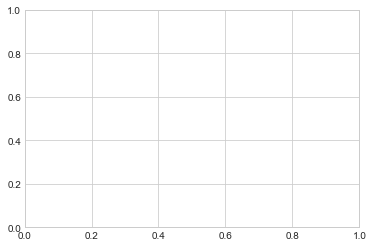

In [45]:
colors = (0,0,0)
area = np.pi*3
#plt.scatter( df['Baths'],df['Price'], s=area, c=colors, alpha=0.5)
plt.scatter( pd.get_dummies(df['BER']),df['Price'], s=area, c=colors, alpha=0.5)